In [1]:
from zipfile import ZipFile
import os

zip_file_path = r"C:\Users\Narendra\jupyter\women-fashion.zip"
extraction_directory = r"C:\Users\Narendra\jupyter\women_fashion"

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])


['women fashion', '__MACOSX']


In [2]:
#correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

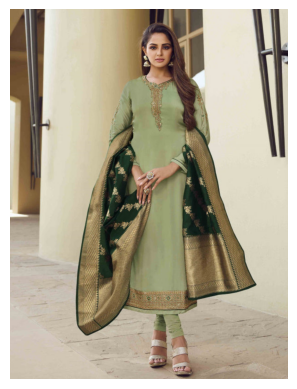

In [3]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define the extraction directory
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# Function to load and display an image
def display_image(file_path):
    try:
        image = Image.open(file_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    except UnidentifiedImageError:
        print(f"Skipping non-image file: {file_path}")

# List the files in the 'women fashion' directory
extracted_files_updated = [
    f for f in os.listdir(extraction_directory_updated)
    if os.path.isfile(os.path.join(extraction_directory_updated, f)) and f.lower().endswith(('.jpg', '.png'))
]

# Display the first image from the list of valid image files
if extracted_files_updated:
    first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
    display_image(first_image_path)
else:
    print("No valid image files found in the 'women fashion' directory.")


In [4]:
import os
import glob

# Directory path containing your images
image_directory = '/content/women_fashion/women fashion'

# Get all image file paths with specified extensions
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', '.webp'))]

# Print the list of image file paths
print(image_paths_list)


[]


In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [27]:
pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 3.0 MB/s eta 0:02:12
   ---------------------------------------- 0.3/390.2 MB 3.4 MB/s eta 0:01:55
   ---------------------------------------- 0.4/390.2 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 0.6/390.2 MB 3.2 MB/s eta 0:02:02
   ---------------------------------------- 0.8/390.2 MB 3.4 MB/s eta 0:01:55
   ---------------------------------------- 0.9/390.2 MB 3.4 MB/s eta 0:01:54
   ---------------------------------------- 1.1/390.2 MB 3.5 MB/s eta 0:01:52
   ---------------------------------------- 1.3/390.2 MB 3.6 MB/s eta 0:01:48
   ---------------------------------------- 1.5/390.2 MB 3.7 MB/s eta 0:01:45
   ---------------------------------------- 1.6/390.2 MB 3.5 MB/s eta 0:01:

In [33]:
pip install tensorflow numpy scipy pillow matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Initialize the model (VGG16 without the top layer for feature extraction)
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to preprocess image for VGG16
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

# Function to extract features from the model
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Local directory containing your images
image_directory = r'C:\Users\Narendra\jupyter\women_fashion\women fashion'

# List all image files (ensure this path is correct)
image_paths_list = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png', '.jpeg', '.webp'))]

# Extract features for all images
all_features = []
for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)

# Ensure `all_features` is ready to be used
print(f"Extracted features for {len(all_features)} images.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


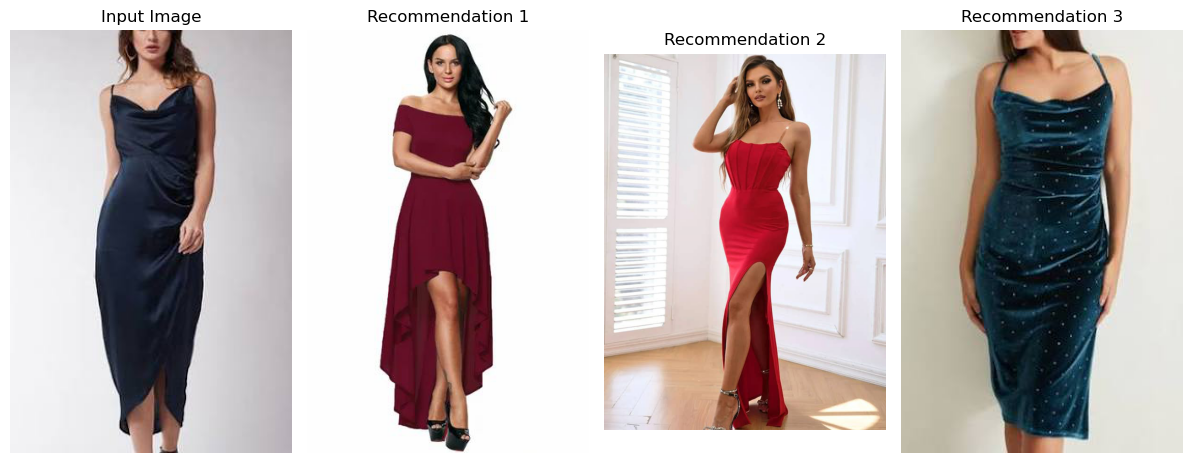

In [13]:
input_image_path = r'C:\Users\Narendra\jupyter\women_fashion\women fashion\dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


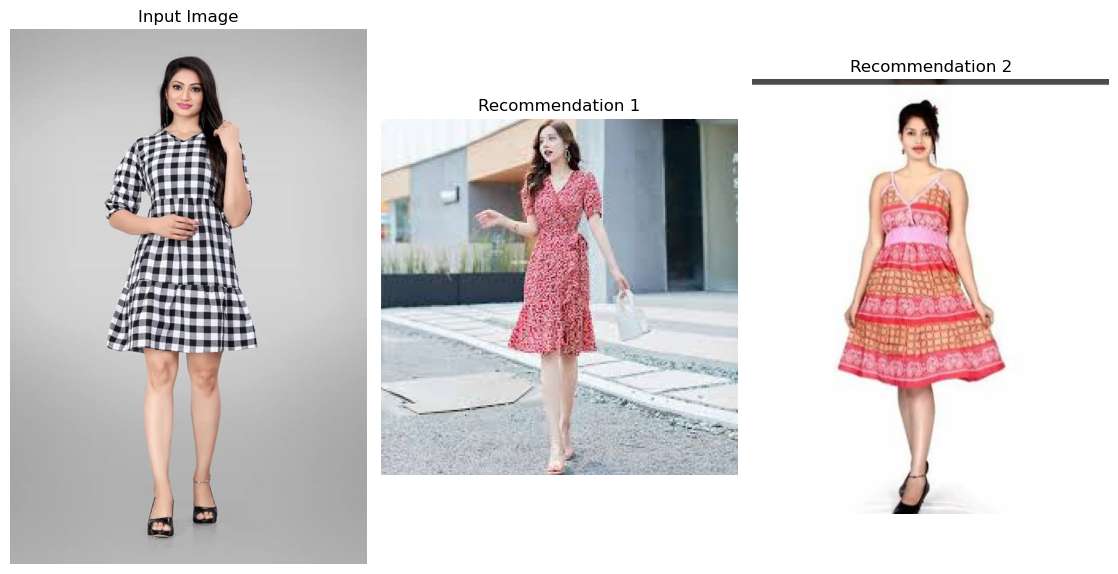

In [19]:
# New input image path
input_image_path = r'C:\Users\Narendra\jupyter\women_fashion\women fashion\black and white gingham checkered A-line dress with a flared skirt.jpg'

# Call the recommendation function with the new input image
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


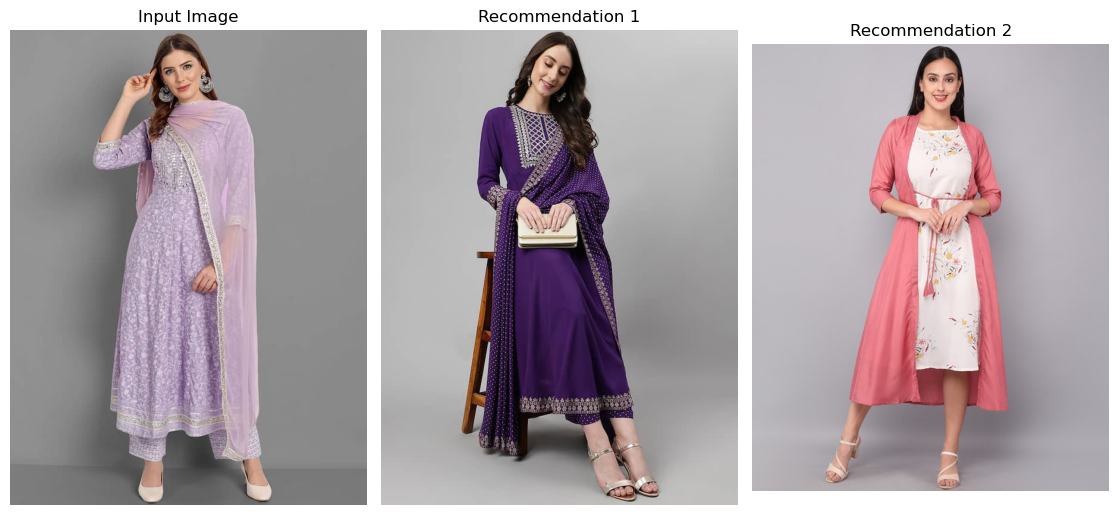

In [20]:
# New input image path
input_image_path = r'C:\Users\Narendra\jupyter\women_fashion\women fashion\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg'

# Call the recommendation function with the new input image
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


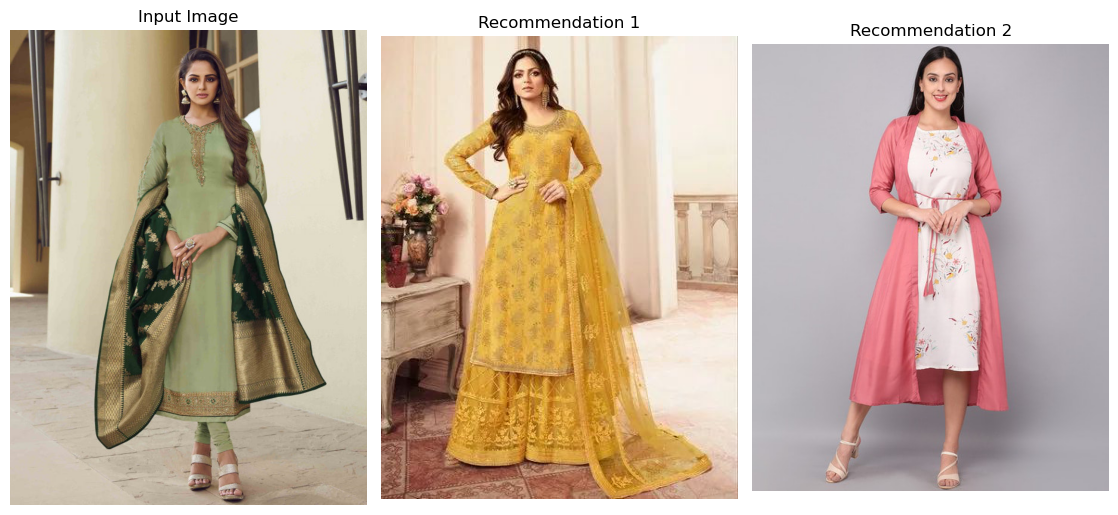

In [22]:
# New input image path
input_image_path = r'C:\Users\Narendra\jupyter\women_fashion\women fashion\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg'

# Call the recommendation function with the new input image
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


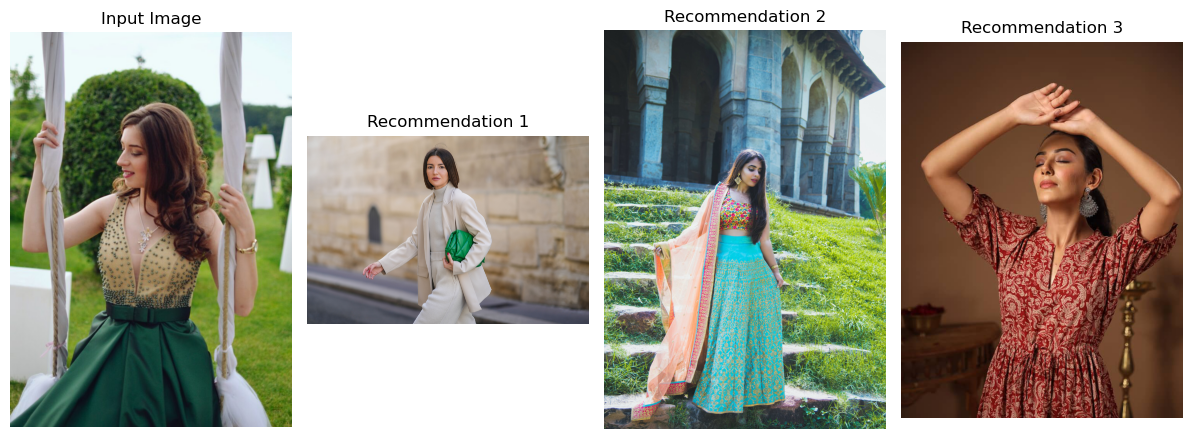

In [26]:
# New input image path
input_image_path = r'C:\Users\Narendra\jupyter\women_fashion\women fashion\beige top adorned with black dots and a green skirt.jpg'
# Call the recommendation function with the new input image
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)
